In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# create dataframe with random coordinates for AOI
points_number = 1000

df = pd.DataFrame({
    'AOI': np.arange(points_number),
    'Latitude': np.random.randint(-80,80,size=(points_number)),
    'Longitude': np.random.randint(-180,180,size=(points_number))
    })

print(df.head(1))


   AOI  Latitude  Longitude
0    0       -73       -123


In [3]:
# converting dataframe to geodataframe
points = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude)).set_crs("EPSG:4326")



Display AOI on the world map

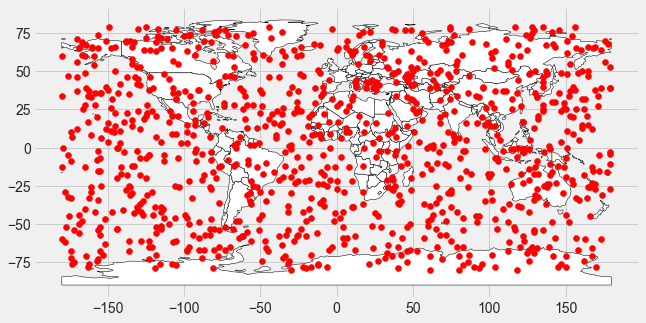

In [4]:
world = geopandas.read_file('naturalearth_lowres')

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black', figsize=(10,5))

# We can now plot our ``GeoDataFrame``.
points.plot(ax=ax, color='red')

plt.show()

In [5]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


### Only points over the land
- display on the map points only located over the land

In [6]:
world.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
points_intersected = geopandas.overlay(points, world, how='intersection')

In [9]:
points_intersected.shape

(312, 9)

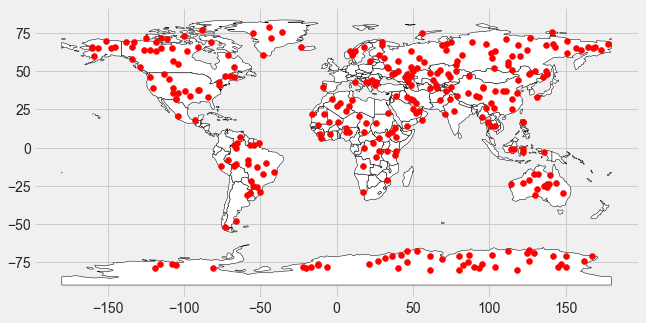

In [10]:
world = geopandas.read_file('naturalearth_lowres')

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black', figsize=(10,5))

# We can now plot our ``GeoDataFrame``.
points_intersected.plot(ax=ax, color='red')

plt.show()

In [11]:
points_intersected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AOI         312 non-null    int32   
 1   Latitude    312 non-null    int32   
 2   Longitude   312 non-null    int32   
 3   pop_est     312 non-null    int64   
 4   continent   312 non-null    object  
 5   name        312 non-null    object  
 6   iso_a3      312 non-null    object  
 7   gdp_md_est  312 non-null    float64 
 8   geometry    312 non-null    geometry
dtypes: float64(1), geometry(1), int32(3), int64(1), object(3)
memory usage: 18.4+ KB


In [26]:
df = points_intersected['continent'].value_counts().to_frame('count')
df['continent'] = df.index

In [30]:
df

,count,continent
Europe,73,Europe
Asia,60,Asia
North America,56,North America
Antarctica,46,Antarctica
Africa,37,Africa
South America,26,South America
Oceania,14,Oceania


Text(0.5, 1.0, 'Number of points per continent\n')

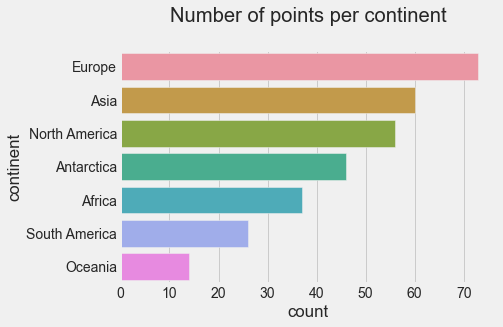

In [31]:
ax = sns.countplot(y="continent", data=points_intersected, order = points_intersected['continent'].value_counts().index )
plt.title("Number of points per continent\n")

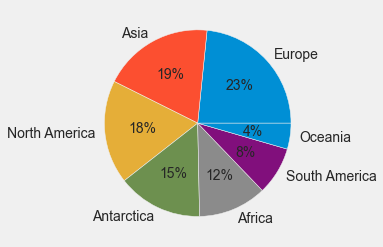

In [33]:
plt.pie(df['count'], labels = df['continent'], autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, 'Number of points per country - Top 10 \n')

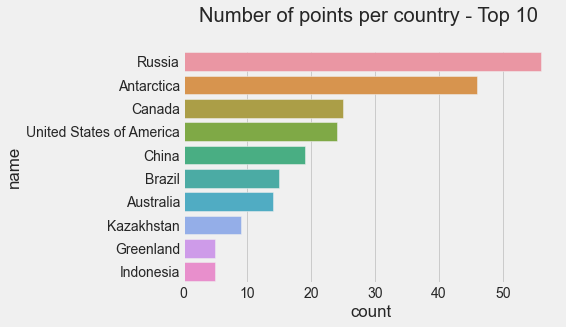

In [20]:
top = 10
ax = sns.countplot(y="name", data=points_intersected, order = points_intersected['name'].value_counts().iloc[:top].index )
plt.title(f"Number of points per country - Top {top} \n")